In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [3]:
#Importing the data in Dtime dataframe with help of Pandas module

Dtime = pd.read_csv("delivery_time.csv")
Dtime.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:

Dtime.info()    #information about the columns
                #sorting time is Integer data type
                #Both columns has 21 observations with no null values !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#renaming the columns for further practice (Changes will be done in dataframe Dtime only But not in original csv file)

Dtime.rename(columns = {'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'}, inplace = True)
Dtime = Dtime.astype({"DeliveryTime": float, "SortingTime": float})
Dtime.columns
   

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [6]:
Dtime = Dtime.astype({"DeliveryTime": float, "SortingTime": float})
Dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [7]:
Dtime.describe()    #mean, standard deviation, minimum and max value of each column is found out

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


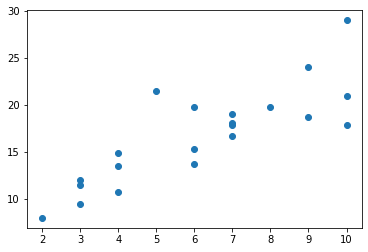

In [8]:
plt.scatter(x=Dtime['SortingTime'],y=Dtime['DeliveryTime'])

In [9]:
Dtime.corr()    


,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


'''
#Pearsons' correlation coefficient =The covariance of two variables divided by the product of their standard deviations. 
#It is usually represented by ρ (rho) or r ==> ρ (X,Y) = cov (X,Y) / σX.

conditions: r has range [-1,1]
r=0 No linear Relation,
r=(0,0.6) or (-0.6,0) WEAK LINEAR relation
r=[0.6,0.85) or (-0.85,-0.6] MODERATE LINEAR relation
r=[0.85,1] or [-1,-0.85] STRONG LINEAR relation 

#............observation: as r=correlation coefficient = 0.82588 (MODERATE LINEAR relation)..............'''

# dISTPLOT OF output variable Delivery time

<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

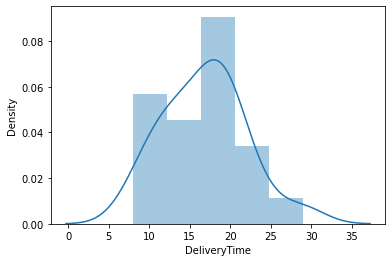

In [10]:
import seaborn as sns
sns.distplot(Dtime['DeliveryTime'])    #output variable pattern from Dtime dataframe

#normally distributed daTA WITH BELL SHAPED CURVE with mean	16.790952

# dISTPLOT OF input variable Sorting time

<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

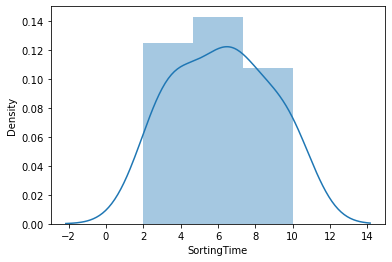

In [11]:
sns.distplot(Dtime['SortingTime'])     #input variable pattern from Dtime dataframe

#normally distributed daTA WITH BELL SHAPED CURVE mean 6.190476

# MODEL 1 : WITH ACTUAL INPUT AND OUTPUT


In [12]:
import statsmodels.formula.api as smf
model1 = smf.ols("DeliveryTime ~ SortingTime",data = Dtime).fit()
model1

In [13]:
#Coefficients
model1.params        

# Delivery Time(i) = 1.6490* Sorting Time(i) + 6.582734
#y= mx +c

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [14]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [15]:
model1.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        17:05:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

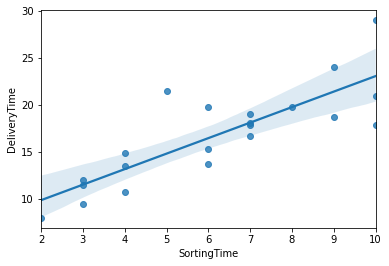

In [16]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=Dtime);

Adj. R-squared:	0.666
AIC:	106.7
thus, model 1 will be the best fit rather than model 2.
lesser the R squared value, Better the model fit !

# MODEL 2: WITH ACTUAL INPUT SQUARED AND OUTPUT

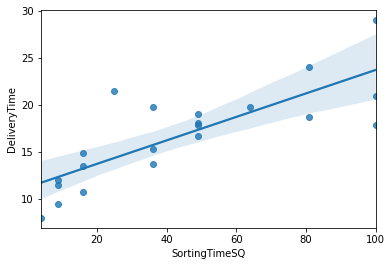

In [17]:
Dtime['SortingTimeSQ']=Dtime['SortingTime']**2       #creating a column in data frame with squared values of Sroting time

model2 = smf.ols("DeliveryTime ~ SortingTimeSQ",data = Dtime).fit()     #creating a linear regression model on this data

sns.regplot(x="SortingTimeSQ", y="DeliveryTime",data=Dtime);

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.74e-05
Time:                        17:05:45   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
SortingTimeSQ     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2.params       # Delivery Time(i) = 1.171794* Sorting Time(i) + 10.318187
#y= mx +c

Intercept        11.237205
SortingTimeSQ     0.124870
dtype: float64

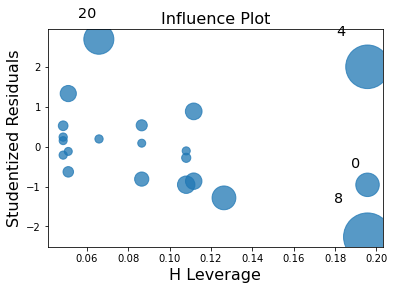

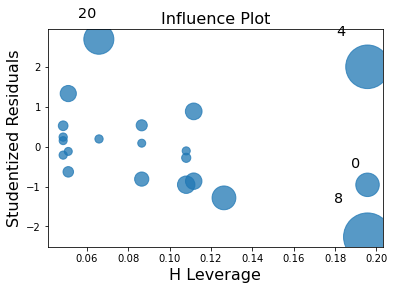

In [20]:
influence_plot(model2)

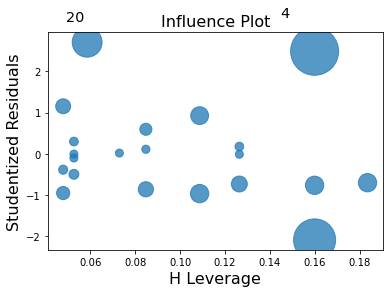

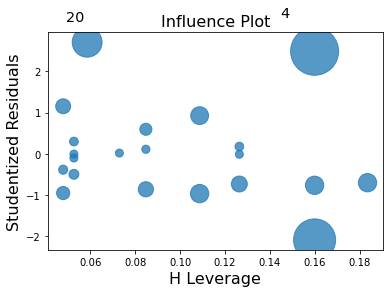

In [21]:
influence_plot(model1)

# MODEL 3 : WITH LOGARITHM OF ACTUAL INPUT  AND OUTPUT

In [22]:
'''# model 3 with log values of sorting time column
import math 
Dtime['SortingTimeLN']=math.log10(Dtime['SortingTime'])       #creating a column in data frame with squared values of Sroting time

model3 = smf.ols("DeliveryTime ~ SortingTimeLN",data = Dtime).fit()     #creating a linear regression model on this data

sns.regplot(x="SortingTimeLN", y="DeliveryTime",data=Dtime);'''

'# model 3 with log values of sorting time column\nimport math \nDtime[\'SortingTimeLN\']=math.log10(Dtime[\'SortingTime\'])       #creating a column in data frame with squared values of Sroting time\n\nmodel3 = smf.ols("DeliveryTime ~ SortingTimeLN",data = Dtime).fit()     #creating a linear regression model on this data\n\nsns.regplot(x="SortingTimeLN", y="DeliveryTime",data=Dtime);'

# Question 2: 2) Salary_hike -> Build a prediction model for Salary_hike

In [23]:
#Importing the data in Dtime dataframe with help of Pandas module

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
df.info()       # no null entry found !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [25]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


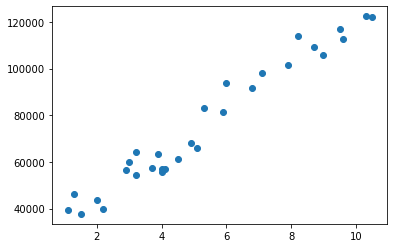

In [26]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'])  #data seems linear

In [27]:
df.corr()       #high correlation r>0.85

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


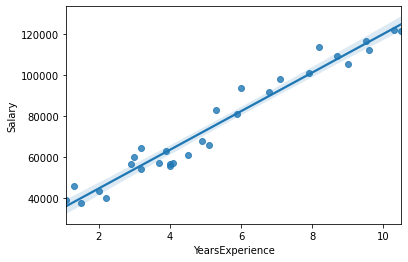

In [28]:
model01 = smf.ols("YearsExperience ~ Salary",data = df).fit()     #creating a linear regression model on this data

sns.regplot(x="YearsExperience", y="Salary",data=df);

In [29]:
model01.params      #slope= 0.000101 and y intercept= -2.383161

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [30]:
model01.summary()      # R-squared:	0.957 , thus good model !!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        17:05:47   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

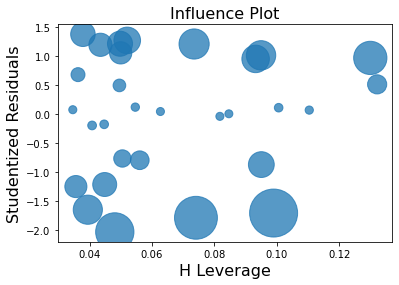

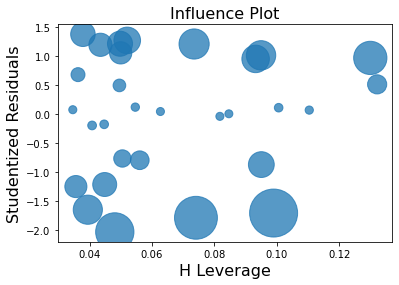

In [31]:
influence_plot(model01)

# Qn 2 with Sklearn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#training a model

from sklearn.linear_model import LinearRegression
lm=LinearRegression()       #created a object named linear regression

In [34]:
X=df[["YearsExperience"]]       #X is input dataframe
y=df[["Salary"]]

In [35]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
# TRAIN TEST SPLIT #on df dataframe
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=10)

In [38]:
type(df['YearsExperience'])  # series output for X_train too

pandas.core.series.Series

In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
df=df.to_numpy()        #from dataframe to array data type

In [41]:
type(df)

numpy.ndarray

In [42]:
# TRAIN TEST SPLIT  #now operation on array
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=10)

In [43]:
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
print(lm.intercept_)  #output is in list form

[25870.55130374]


In [45]:
print(lm.coef_) #output is an array

[[9437.37853884]]


In [46]:
X_train.columns

Index(['YearsExperience'], dtype='object')

In [47]:
cdf=pd.DataFrame(lm.coef_,X_train.columns,columns=['coef_'])

In [48]:
cdf

,coef_
YearsExperience,9437.378539


In [49]:
# predictions
predictions=lm.predict(X_test)      #predicted prices
predictions #array output

array([[ 90044.72536786],
       [ 56070.16262803],
       [ 53238.94906638],
       [ 40026.619112  ],
       [ 44745.30838142],
       [ 92875.93892951],
       [ 64563.80331299],
       [116469.38527661],
       [ 63620.06545911],
       [ 38139.14340424],
       [ 82494.82253679],
       [ 68338.75472853]])

In [50]:
y_test  #actual prices

,Salary
20,91738.0
7,54445.0
5,56642.0
2,37731.0
3,43525.0
21,98273.0
13,57081.0
27,112635.0
12,56957.0
1,46205.0


In [51]:
# comparisons between actual and predicted output

Text(0, 0.5, 'predictions')

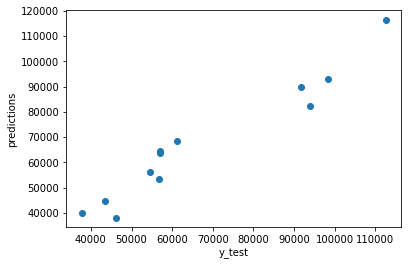

In [52]:
#1.Scatter PLot

plt.scatter(y_test,predictions)     #if output is linear, thus, good model is predicted by machine
plt.xlabel("y_test")
plt.ylabel("predictions")

#observation: its a linear output

<AxesSubplot:ylabel='Density'>

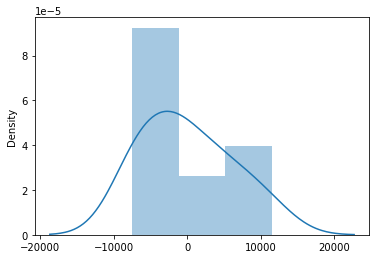

In [53]:
#2. distplot
sns.distplot((y_test - predictions))        #histogram of residuals,
                                            # if normal distribution, then it is a correct model
                                            #if not normal distribution, change the model

#observation: Normally distributed model, thus Linear regression used is corredct !!

In [54]:
# loss fuctions
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)     #MAE

5029.459966160075

In [55]:
#RMSE(minimum error represents better model)
metrics.mean_squared_error(y_test,predictions)      #MSE

34696520.120191045

In [56]:
np.sqrt(metrics.mean_squared_error(y_test,predictions)) #RMSE

#observation :
# thus error cannor be lesser or more than 5890.37521 from the predicted value.
#thus the value of future data or upcoming salary obs will follow liner regression 
# and it will be more or less by RMSE around the predicted line points 

5890.375210476073

In [57]:
print(lm.score(X_test, y_test))   # R sq value is also greater than 0.8, thus, good model

0.9381709528344293


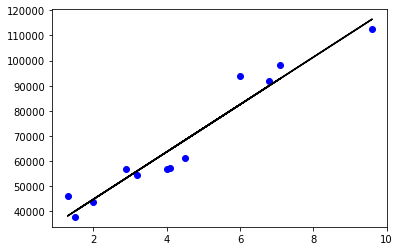

In [58]:
y_pred = lm.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()